In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import sklearn.metrics as metrics

In [2]:
housing_data = pd.read_csv('DatenAusgegeben1.2_UTF8_manuell.csv', sep=";", keep_default_na=False)

# Bereinigung und Feature Engeneering

# für €/qm² für besseren Vergleich der Daten
housing_data["Preisproqm"] = housing_data["Preis"]/housing_data["Wohnflaeche in qm"]

# monate seit 2136
housing_data["Monate"] = (housing_data["Verkaufsjahr"]-2136)*12 + housing_data["Verkaufsmonat"] -1

# Werte der Heizungsqualitaet in Zahlen umwandeln
housing_data["Heizungsqualitaet"] = [1 if x=="Schl" else 2 if x=="Ud" else 3 if x=="Ty" else 4 if x=="Gut" else 5 for x in housing_data["Heizungsqualitaet"]]

# Zustand, 1-10 wird auf 1-5 gemapt, das ist zwar ein bisschen ungenauer, aber einfacher zu vergleichen
housing_data["Zustandf"] = [int(x/2) + x%2 for x in housing_data["Zustand"]]

# Alle Zustände werden von 1...X auf 0....X-1 geschoben
housing_data["HeizungsqualitaetN"] = [ x-1 for x in housing_data["Heizungsqualitaet"]]
housing_data["ZustandN"] = [ x-1 for x in housing_data["Zustandf"]]
housing_data["FassadeN"] = [ x-1 for x in housing_data["Zustand Fassade"]]
housing_data["KuecheN"] = [ x-1 for x in housing_data["Kuechenqualitaet"]]

# NA in Garage Typ wird zu "Keine Garage"
housing_data["Garage Typ"] = ['keine Garage' if x=='NA' else x for x in housing_data["Garage Typ"]]

In [3]:
#Extract X and y from dataset

X = housing_data.iloc[:,-4:]
X["Wohnflaeche in qm"] = housing_data["Wohnflaeche in qm"]
y = housing_data["Preis"]

In [4]:
#Prepare data

#Most important features 
#air conditioning, heater quality, kitchen quality, state of house, state of facade 

#Encode features (Label ord One-Hot)

#Separate into training- and testdata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1600, 5) (1600,) (400, 5) (400,)


In [5]:
 #Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
ridge = linear_model.Ridge(alpha=.5)
lasso = linear_model.Lasso(alpha=0.1)

reg.fit(X_train,, y_train
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-5-0199eee96878>, line 7)

In [130]:
#Validation
y_pred_reg = reg.predict(X_test)
y_pred_ridge = reg.predict(X_test)
y_pred_lasso = reg.predict(X_test)

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

metrics = ["mean_squared_error", "r2_score", "explained_variance_score", "max_error"]
fun = sklearn.metrics.r2_score

print(fun(y_test, y_pred_reg), fun(y_test, y_pred_ridge), fun(y_test, y_pred_lasso))

NameError: name 'sklearn' is not defined

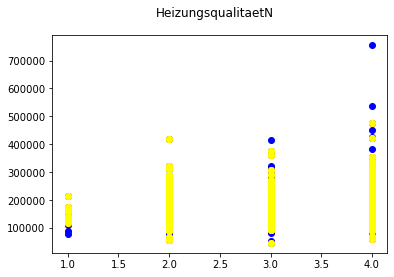

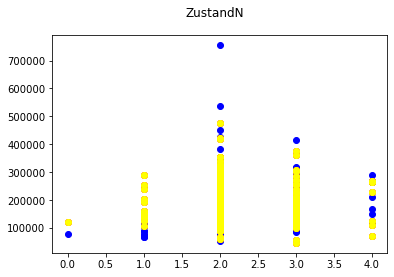

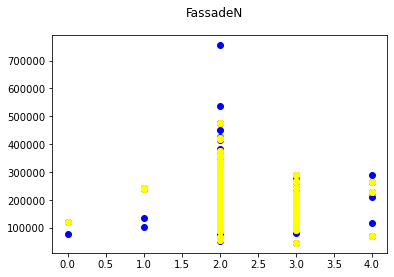

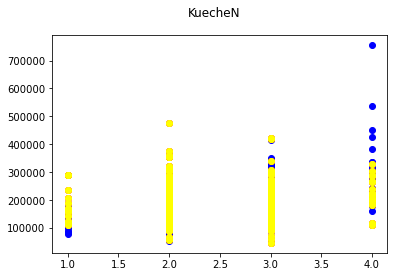

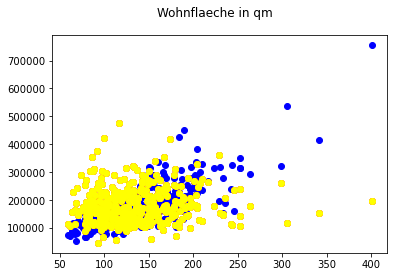

In [142]:
plt.scatter(X_test["HeizungsqualitaetN"], y_test, c="blue")
plt.scatter(X_test["HeizungsqualitaetN"], y_pred_reg, c="red")
plt.scatter(X_test["HeizungsqualitaetN"], y_pred_ridge, c="orange")
plt.scatter(X_test["HeizungsqualitaetN"], y_pred_lasso, c="yellow")
plt.suptitle("HeizungsqualitaetN")
plt.show()

plt.scatter(X_test["ZustandN"], y_test, c="blue")
plt.scatter(X_test["ZustandN"], y_pred_reg, c="red")
plt.scatter(X_test["ZustandN"], y_pred_ridge, c="orange")
plt.scatter(X_test["ZustandN"], y_pred_lasso, c="yellow")
plt.suptitle("ZustandN")
plt.show()

plt.scatter(X_test["FassadeN"], y_test, c="blue")
plt.scatter(X_test["FassadeN"], y_pred_reg, c="red")
plt.scatter(X_test["FassadeN"], y_pred_ridge, c="orange")
plt.scatter(X_test["FassadeN"], y_pred_lasso, c="yellow")
plt.suptitle("FassadeN")
plt.show()

plt.scatter(X_test["KuecheN"], y_test, c="blue")
plt.scatter(X_test["KuecheN"], y_pred_reg, c="red")
plt.scatter(X_test["KuecheN"], y_pred_ridge, c="orange")
plt.scatter(X_test["KuecheN"], y_pred_lasso, c="yellow")
plt.suptitle("KuecheN")
plt.show()

plt.scatter(X_test["Wohnflaeche in qm"], y_test, c="blue")
plt.scatter(X_test["Wohnflaeche in qm"], y_pred_reg, c="red")
plt.scatter(X_test["Wohnflaeche in qm"], y_pred_ridge, c="orange")
plt.scatter(X_test["Wohnflaeche in qm"], y_pred_lasso, c="yellow")
plt.suptitle("Wohnflaeche in qm")
plt.show()